# Decision Tree Lecture Example

## Lecture 2: 9/10/21
Adaptd from: https://github.com/ageron/handson-ml/blob/master/06_decision_trees.ipynb

# 0. Imports

In [2]:
# Common imports
import numpy as np
import os
import re
!pip install graphviz

In [3]:
# to make this notebook's output stable across runs
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [4]:
# to allow tree visualization
import IPython
import graphviz

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [7]:
from sklearn.tree import export_graphviz

def draw_tree(t, col_names=None):
    s=export_graphviz(t, out_file=None, feature_names=col_names, filled=True, 
                      special_characters=True, rotate=True, rounded=True)
    IPython.display.display(graphviz.Source(re.sub('Tree {',f'Tree {{ size=10; ratio=0.6', s)))

# 1. Load Iris data, fit model

In [8]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [9]:
X.shape # visualization is easier with two features

(150, 2)

In [10]:
np.unique(y)

array([0, 1, 2])

In [11]:
iris.feature_names[2:]

['petal length (cm)', 'petal width (cm)']

In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 1.1 Gini: default critieria

In [13]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, )

In [14]:
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [29]:
draw_tree(tree_clf, iris.feature_names[2:])

KeyboardInterrupt: 

In [16]:
tree_clf.max_depth

2

## 1.2 Entropy: default critiria

In [30]:
tree_clf_entropy = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf_entropy.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [34]:
draw_tree(tree_clf_entropy, iris.feature_names[2:])

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

## 1.3 Visualize split

In [18]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

Text(4.05, 0.5, '(Depth=2)')

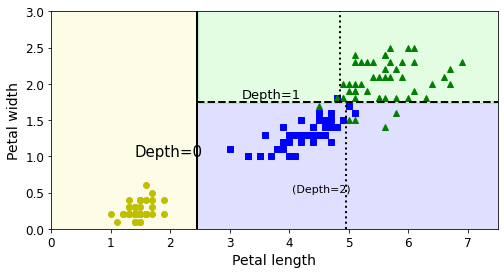

In [19]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

## 1.4 Predicting classes and class probabilities

In [20]:
tree_clf.predict_proba([[2, 1.5]])

array([[1., 0., 0.]])

In [21]:
tree_clf.predict([[2, 2.5]])

array([0])

# 2 Sensitivity to training set details

## to describe the weaknesses of decision trees

## Remove the widest Iris-Versicolor flower

How do I find the row and remove it?

In [22]:
X[:,1] #index 1 col is the width

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [23]:
y==1 #target ==1 is Iris-Versicolor

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [24]:
X[:,1][y==1] #all widths for versicolor

array([1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. ,
       1.4, 1.3, 1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4,
       1.4, 1.7, 1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3,
       1.3, 1.2, 1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3])

In [25]:
X[:,1][y==1].max()

1.8

In [26]:
(X[:, 1]==X[:, 1][y==1].max()) # all width ==1.8

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False,  True,
        True,  True,

In [27]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower

array([[4.8, 1.8]])

In [28]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

In [29]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

Text(1.0, 1.8, 'Depth=1')

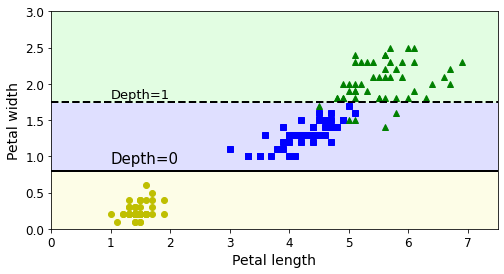

In [30]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

## Do we trust this model?
 After we removed one data point, the entire model changed (after removing the widest flower). This can be described as an UNSTABLE model. As humans, if we change our minds on a small difference or small piece of information, how can we be sure that our own mental models are accurate?

# 3. Regularization

Text(0.5, 1.0, 'min_samples_leaf = 10')

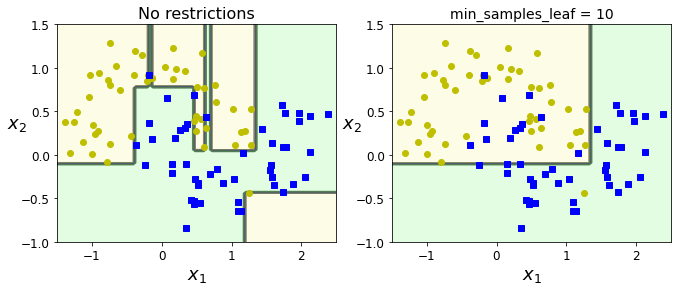

In [31]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=10, max_depth=3, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

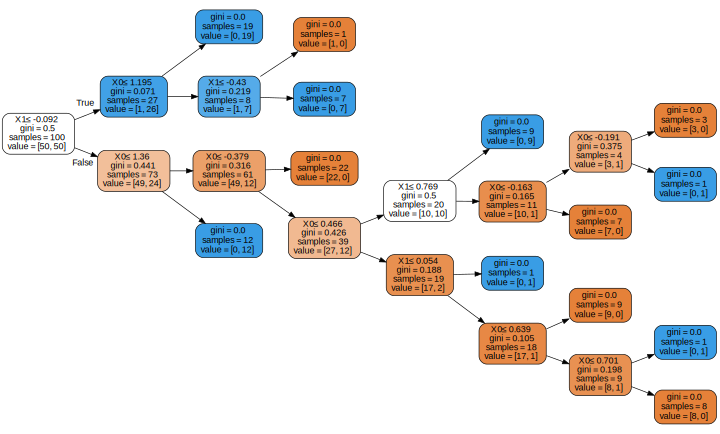

In [32]:
draw_tree(deep_tree_clf1)

In [33]:
deep_tree_clf1.tree_.max_depth

7

In [34]:
deep_tree_clf2.tree_.max_depth

3

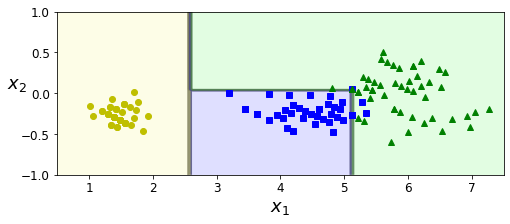

In [35]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

# 4 Sensitivity to rotation

In [36]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

In [37]:
angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

In [38]:
tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)

DecisionTreeClassifier(random_state=42)

In [39]:
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

DecisionTreeClassifier(random_state=42)

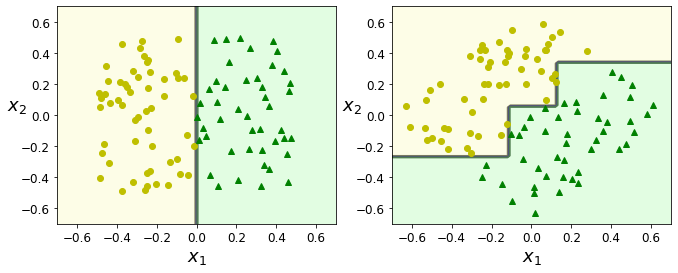

In [40]:
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

# 5 Regression trees

In [41]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

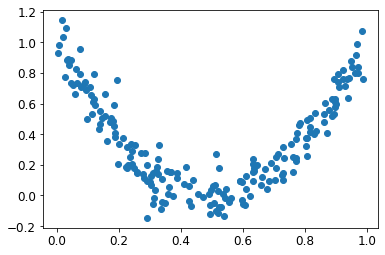

In [42]:
plt.plot(X,y,'o')

In [43]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

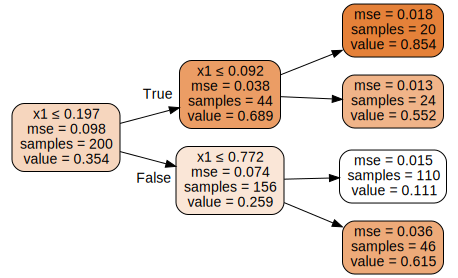

In [44]:
draw_tree(tree_reg, col_names = ['x1'])

In [45]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [46]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

Text(0.5, 1.0, 'max_depth=3')

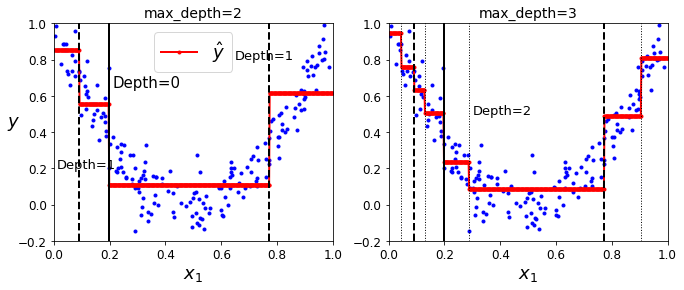

In [47]:
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

In [48]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(min_samples_leaf=10, random_state=42)

Text(0.5, 1.0, 'min_samples_leaf=10')

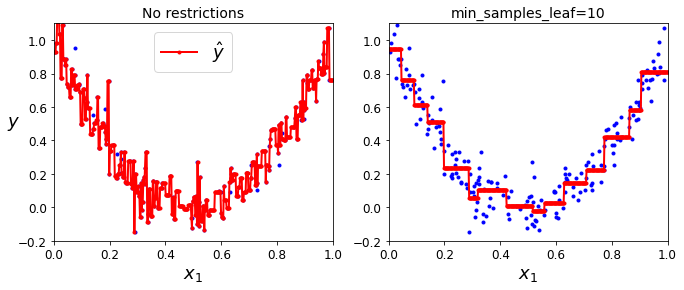

In [49]:
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)